In [56]:
# import libraries

import pandas as pd
import numpy as np
from math import sqrt,pi,exp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/500_Person_Gender_Height_Weight_Index.csv')

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [9]:
df = df.drop(columns=['Index'], axis=1)

In [7]:
df = df.replace(to_replace='Male', value=1)

In [8]:
df = df.replace(to_replace='Female', value=0)

In [10]:
df.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [11]:
data = df.as_matrix()

/home/tejaswinicp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
data

array([[  1, 174,  96],
       [  1, 189,  87],
       [  0, 185, 110],
       ...,
       [  0, 141, 136],
       [  1, 150,  95],
       [  1, 173, 131]])

NameError: name 'mpatches' is not defined

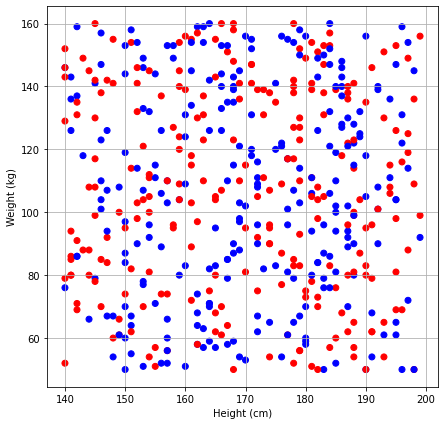

In [18]:
features = data[:,[1,2]]
labels = data[:,0]

f,ax1 = plt.subplots(1,1, figsize=(7,7))

ax1.scatter(features[:,0], features[:,1], c=labels, cmap=plt.cm.bwr)
ax1.grid(True)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

recs = []
class_colors = ["r","b"]
for i in range(2):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colors[i]))
plt.legend(recs,["F","M"], loc=1)

In [22]:
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.1, random_state=100)

In [28]:
def getPriors(labels):
    priors = {}
    for className in labels:
        N = labels.size
        class_occurence = (labels == className).sum()
        priors[className] = class_occurence/N
    return priors

priors = getPriors(train_y)

In [29]:
priors

{1: 0.4888888888888889, 0: 0.5111111111111111}

In [33]:
def fit(features, labels):
    uniqueClasses = np.unique(labels)
    coeffs = {}
    for className in uniqueClasses:
        featuresInClass = features[labels == className]
        statsInClass = [(np.mean(feature), np.std(feature)) for feature in zip(*featuresInClass)]
        coeffs[className] = statsInClass
        
    return coeffs

model = fit(train_x,train_y)

In [34]:
model

{0: [(169.8217391304348, 15.401537374468967),
  (106.20869565217392, 32.950818595670185)],
 1: [(169.87272727272727, 17.02570734929394),
  (107.03181818181818, 31.785987283759265)]}

In [41]:
def getLikelihood(x, featureIndex, model, className):
    classStats = model[className]
    mean = classStats[featureIndex][0]
    std = classStats[featureIndex][1]
    f =  (1/(sqrt(2*pi*pow(std,2)))) * exp(-pow((x-mean),2)/(2*pow(std,2)))
    return f

def getPosterior(x, model, priors):
    posteriors = {}
    for className in priors:
        p = 1
        for featureIndex in range(x.size):
            p = p * (getLikelihood(x[featureIndex], featureIndex, model, className) * priors[className])
        posteriors[className] = p
    return posteriors

In [81]:
x = np.array([50])

In [82]:
getLikelihood(x,0,model,0)

1.8631950219121776e-15

In [83]:
getLikelihood(x,0,model,1)

4.0320927070631823e-13

In [84]:
def classify(x, model, priors):
    posteriors = getPosterior(x, model, priors)
    return max(posteriors, key=lambda key: posteriors[key])

predictions = [classify(x, model, priors) for x in test_x]

In [85]:
accuracy_score(test_y, predictions)

0.52